# Pneumonia Detection with Pytorch

## What is Pneumonia?

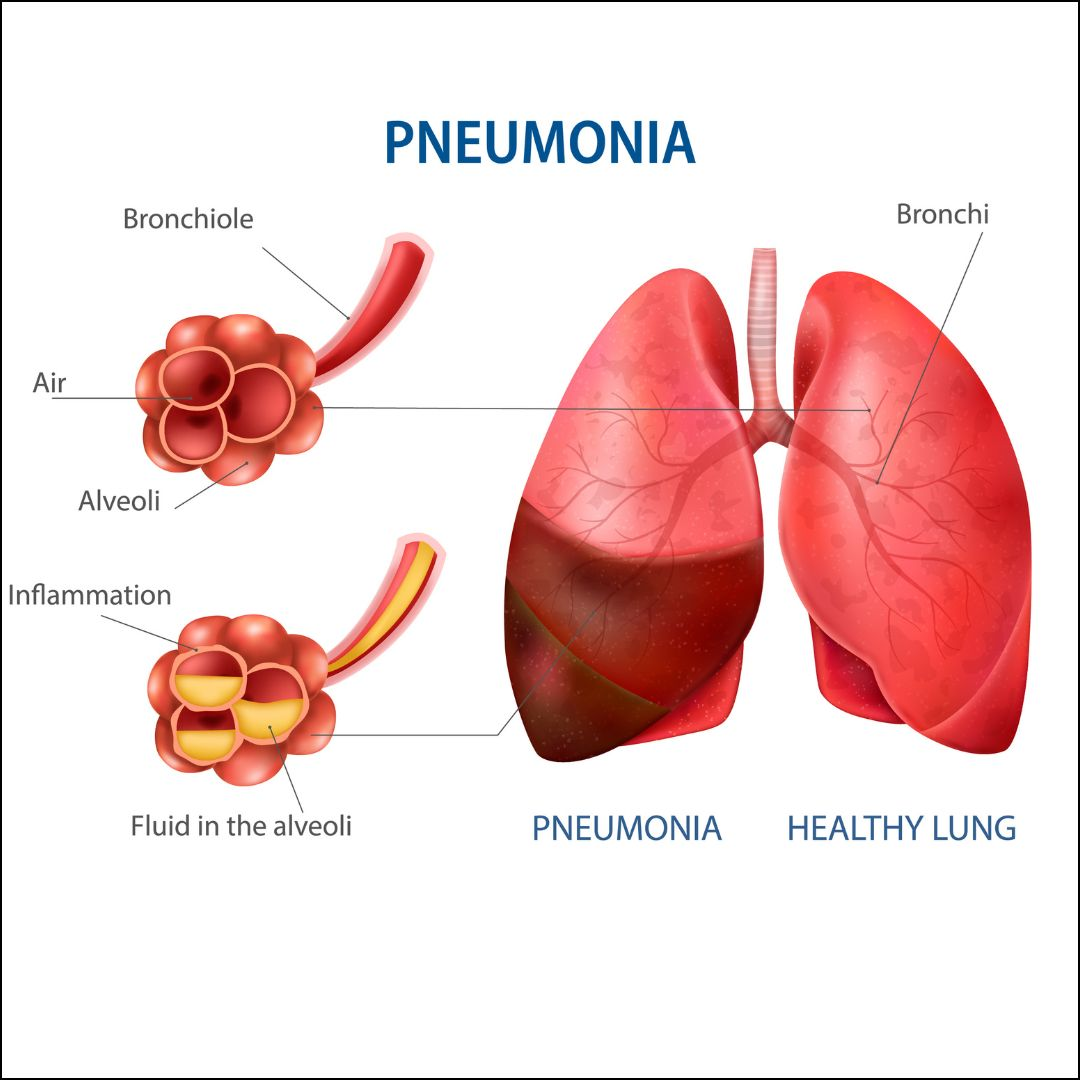

Pneumonia is a lung infection affecting one or both lungs, characterized by inflammation and fluid or pus accumulation in the air sacs. Commonly caused by bacteria like Streptococcus pneumoniae or viruses like influenza, it presents symptoms such as coughing, fever, chest pain, and breathing difficulties. Risk factors include age extremes, weakened immune systems, chronic diseases, and smoking. Diagnosis involves physical exams, chest X-rays, and sometimes blood or sputum tests. Our goal in this project is to develop a robust neural network model capable of accurately classifying X-ray images as either showing signs of pneumonia or being normal. By leveraging deep learning techniques and a dataset of labeled X-ray images, the aim is to create a model that can assist medical professionals in quickly and accurately diagnosing pneumonia, potentially leading to improved patient outcomes through early detection and intervention.


In [17]:
## importing modules ##

# import PyTorch
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms

# for file system
import os
from pathlib import Path
from PIL import Image
import shutil

# progress bar
import tqdm
from tqdm.auto import tqdm

# import matplotlib for visualization
import matplotlib.pyplot as plt

# for model evaluation
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

# for randimization
import random

# type
from typing import List, Dict, Tuple
import string


In [18]:
device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [30]:
# have a look at our image

transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize all image
    transforms.ToTensor()
])


data_dir ="../data/train"


dataset = datasets.ImageFolder(root=data_dir, transform=transform)


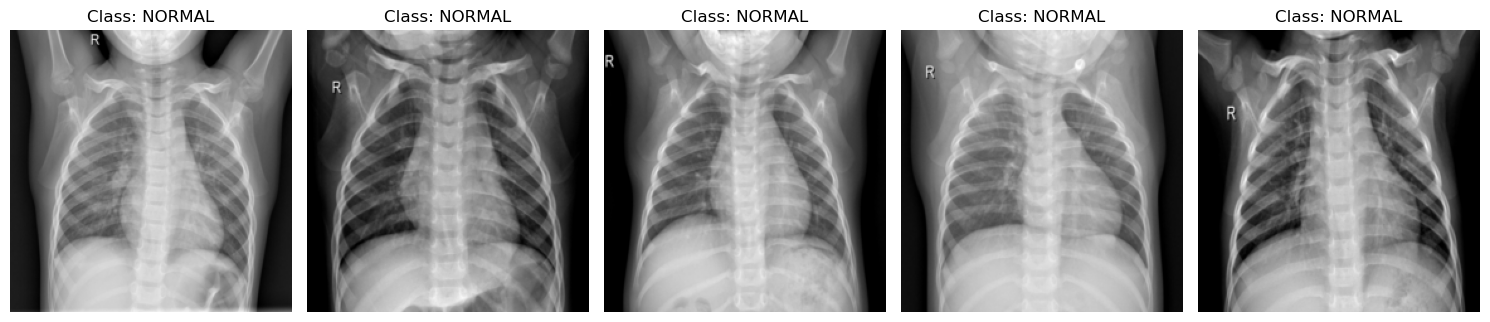

In [31]:
def show_images(dataset, num_images=5):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        image, label = dataset[i]
        axs[i].imshow(image.permute(1, 2, 0), cmap='gray')  # Convert CHW to HWC
        axs[i].set_title(f"Class: {dataset.classes[label]}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

show_images(dataset)


In [38]:
train_dr = "data\train"
val_dir = "data\val"

['d', 'a', 't', 'a', '\t', 'r', 'a', 'i', 'n']

Classes: ['NORMAL', 'PNEUMONIA']
Class 'NORMAL' has 1341 images.
Class 'PNEUMONIA' has 3875 images.


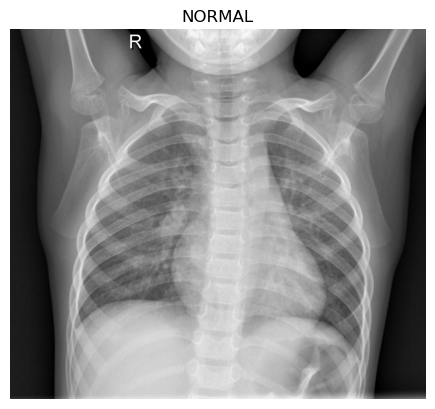

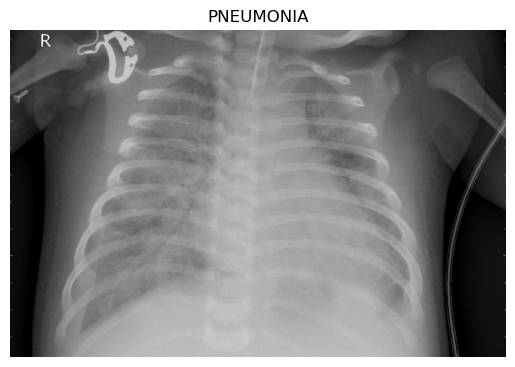

In [42]:
# Lung Disease Detection EDA

import os
from PIL import Image
import matplotlib.pyplot as plt

data_dir = '../data/train'
classes = os.listdir(data_dir)
print('Classes:', classes)

for cls in classes:
    n_images = len(os.listdir(os.path.join(data_dir, cls)))
    print(f"Class '{cls}' has {n_images} images.")

# Show sample images
for cls in classes:
    sample_img_path = os.path.join(data_dir, cls, os.listdir(os.path.join(data_dir, cls))[0])
    img = Image.open(sample_img_path)
    plt.imshow(img.convert("L"), cmap='gray')
    plt.title(cls)
    plt.axis('off')
    plt.show()
